In [1]:
%matplotlib notebook

In [5]:
# Dependencies
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states

In [7]:
# Census API Key (from Kate's notebook)
from config import api_key
c = Census(api_key, year=2017)

# Import broadband_stats in order to get list of blockgroup
broadband_csv = "Resources/mn_broadband_stats.csv"
broadband_df = pd.read_csv(broadband_csv)
broadband_df.head()

,BlockCode,Max Down,Mean Down,Max Up,Mean Up
0,270017701001000,30.0,14.25,3.0,1.825
1,270017701001001,30.0,14.25,3.0,1.825
2,270017701001002,30.0,14.25,3.0,1.825
3,270017701001003,30.0,14.25,3.0,1.825
4,270017701001004,30.0,14.25,3.0,1.825


In [8]:
#load census blocks and school attendance areas
census = "Resources/society_redistricting_2010.gpkg"
school_areas = "Resources/bdry_school_attendance_areas.gpkg"

census_block_df = gpd.read_file(census)
school_area_df = gpd.read_file(school_areas)

In [9]:
#pull in the point location of each school
school_locs = "Resources/struc_school_program_locs.gpkg"
school_org_id = gpd.read_file(school_locs)



In [41]:
#Assign spatial reference datum for census block and school spatial dataframes
#Note: these spatial dataframes are not in Github due to their size. They have been saved in Google drive due to file size
census_block_df = census_block_df.to_crs({'init': 'epsg:26915'})
school_area_df = school_area_df.to_crs({'init': 'epsg:26915'})
#Intersect the school and census spatial data frames
census_school_intersect = gpd.sjoin(census_block_df, school_area_df, how="inner", op='intersects')



In [56]:
school_org_id = school_org_id.to_crs({'init': 'epsg:26915'})
school_area_df = school_area_df.to_crs({'init': 'epsg:26915'})


school_ORGID_intersect = gpd.sjoin(school_area_df, school_org_id,  how="inner", op='intersects')




list(census_block_df.columns)

['ID',
 'AREA',
 'COLORING',
 'BLOCK',
 'BLOCKGROUP',
 'TRACT',
 'COUNTY',
 'STATE',
 'BLOCK2000',
 'MCD',
 'SUBMCD',
 'PLACE',
 'CONCITY',
 'VTD',
 'CONGRESS',
 'LOWERSLD',
 'UPPERSLD',
 'COUNTYLD',
 'CITYLD',
 'INDIAN',
 'TRUST',
 'TRIBALSUB',
 'ANRC',
 'CSA',
 'CBSA',
 'CBSADIV',
 'UA',
 'UGA',
 'ELEMSCHOOL',
 'SECSCHOOL',
 'UNIFSCHOOL',
 'ZIP5',
 'URBANRURAL',
 'POP2000',
 'POPULATION',
 'HISPANIC_O',
 'NH_WHT',
 'NH_DOJ_BLK',
 'NH_DOJ_IND',
 'NH_DOJ_ASN',
 'NH_DOJ_HWN',
 'NH_DOJ_OTH',
 'NH_DOJ_OT1',
 'F18_POP_20',
 'F18_POP',
 'H18_POP',
 'NH18_WHT',
 'NH18_DOJ_B',
 'NH18_DOJ_I',
 'NH18_DOJ_A',
 'NH18_DOJ_H',
 'NH18_DOJ_O',
 'NH18_DOJ_1',
 'SLIVER',
 'USSENGP02',
 'USSENIP02',
 'USSENR02',
 'WELLSTONE',
 'USSENDFL02',
 'USSENCP02',
 'USSENWI02',
 'CONGGP02',
 'CONGIP02',
 'CONGR02',
 'CONGDFL02',
 'CONGNNT02',
 'CONGWI02',
 'MNSENGP02',
 'MNSENIP02',
 'MNSENR02',
 'MNSENDFL02',
 'MNSENCP02',
 'MNSENICP02',
 'MNSENWI02',
 'MNLEGGP02',
 'MNLEGIP02',
 'MNLEGR02',
 'MNLEGDFL02',
 'MNL

In [58]:
school_ORGID_polygon=school_ORGID_intersect[['UNI_TYP_right','UNI_MAJ_right', 'UNI_IMD', 'ORGID','ORGID_NUM', 'geometry']]
census_block_df_subset=census_block_df[['BLOCK','TRACT', 'geometry']]

In [59]:
test = gpd.sjoin(census_block_df_subset, school_ORGID_polygon, how="inner", op='intersects')

In [60]:
list(test.columns)

['BLOCK',
 'TRACT',
 'geometry',
 'index_right',
 'UNI_TYP_right',
 'UNI_MAJ_right',
 'UNI_IMD',
 'ORGID',
 'ORGID_NUM']

In [38]:
school_ORGID_polygon=school_ORGID_intersect[['UNI_TYP_right','UNI_MAJ_right', 'UNI_IMD', 'ORGID','ORGID_NUM', 'geometry']]

In [9]:
#Create a subset of the intersected spatial dataframe 
census_subset=census_school_intersect[['STATE', 'BLOCKGROUP', 'BLOCK', 'TRACT', 'MCD', 'SUBMCD', 'PLACE', 'UNI_MAJ', 'UNI_TYP', 'UNI_NAM', 'HIGH_NAME', 'MIDD_NAME', 'ELEM_NAME', 'POPULATION', 'geometry']]

In [7]:
#Create csv of census merged with schools
census_subset.to_csv('Resources/census_subset.csv')

In [8]:
#Create csv of school locations
school_locations_df.to_csv('Resources/school_locations_df.csv')

NameError: name 'school_locations_df' is not defined

In [34]:
#load the graduation rate csv that has ORGID created for each secondary school
clean_grad = "Resources/CleanedGradFile2018.csv"
grad_rates = pd.read_csv(clean_grad)

grad_rates['ORGID'] = grad_rates['ORGID'].map(lambda x: f'{x:0>12}')

In [61]:
#
school_ORGID_merged = pd.merge(test, grad_rates,  how="inner", on="ORGID")

In [62]:
school_ORGID_merged

,BLOCK,TRACT,geometry,index_right,UNI_TYP_right,UNI_MAJ_right,UNI_IMD,ORGID,ORGID_NUM,Unnamed: 0,School Name,Demographic Description,Ending Status,Four Year Percent,Four Year Total,Physical Line 1,Physical City,Physical State,Physical Zip,Consistent Attendance
0,271370114002121,27137011400,"POLYGON ((563689.2199367753 5253232.147392472,...",751,01,2711,040,012711040000,1.271104e+10,1853,MESABI EAST SECONDARY,All Students,Graduate,86.76,68,601 N 1st St W,Aurora,MN,55705-1301,82.65
1,271370114002236,27137011400,"POLYGON ((570103.4706400972 5241579.915064286,...",751,01,2711,040,012711040000,1.271104e+10,1853,MESABI EAST SECONDARY,All Students,Graduate,86.76,68,601 N 1st St W,Aurora,MN,55705-1301,82.65
2,271370114002116,27137011400,"POLYGON ((571927.5697937486 5242048.729431494,...",751,01,2711,040,012711040000,1.271104e+10,1853,MESABI EAST SECONDARY,All Students,Graduate,86.76,68,601 N 1st St W,Aurora,MN,55705-1301,82.65
3,271370114002152,27137011400,"POLYGON ((569458.6838608072 5244689.955503405,...",751,01,2711,040,012711040000,1.271104e+10,1853,MESABI EAST SECONDARY,All Students,Graduate,86.76,68,601 N 1st St W,Aurora,MN,55705-1301,82.65
4,271370114002153,27137011400,"POLYGON ((570573.6117597707 5245656.542985615,...",751,01,2711,040,012711040000,1.271104e+10,1853,MESABI EAST SECONDARY,All Students,Graduate,86.76,68,601 N 1st St W,Aurora,MN,55705-1301,82.65
5,271370114002132,27137011400,"POLYGON ((570166.6154699982 5246916.20542217, ...",751,01,2711,040,012711040000,1.271104e+10,1853,MESABI EAST SECONDARY,All Students,Graduate,86.76,68,601 N 1st St W,Aurora,MN,55705-1301,82.65
6,271370114002148,27137011400,"POLYGON ((570166.6154699982 5246916.20542217, ...",751,01,2711,040,012711040000,1.271104e+10,1853,MESABI EAST SECONDARY,All Students,Graduate,86.76,68,601 N 1st St W,Aurora,MN,55705-1301,82.65
7,271370114002150,27137011400,"POLYGON ((570466.0572771184 5243696.269999369,...",751,01,2711,040,012711040000,1.271104e+10,1853,MESABI EAST SECONDARY,All Students,Graduate,86.76,68,601 N 1st St W,Aurora,MN,55705-1301,82.65
8,271370114002149,27137011400,"POLYGON ((571910.1669710994 5246944.944451143,...",751,01,2711,040,012711040000,1.271104e+10,1853,MESABI EAST SECONDARY,All Students,Graduate,86.76,68,601 N 1st St W,Aurora,MN,55705-1301,82.65
9,271370114002154,27137011400,"POLYGON ((571903.5314650112 5248209.295619189,...",751,01,2711,040,012711040000,1.271104e+10,1853,MESABI EAST SECONDARY,All Students,Graduate,86.76,68,601 N 1st St W,Aurora,MN,55705-1301,82.65


In [14]:
#This section creates a file that is too large to deal with
district_grad_rate  = pd.merge(school_ORGID_merged, census_subset,   how="inner", on="UNI_MAJ")
district_grad_rate
#district_grad_rate.to_csv('Resources/district_grad_rate.csv')

,UNI_TYP_x,UNI_MAJ,UNI_IMD,ORGID,ORGID_NUM,SCHNAME,ADDRESS,CITY,ZIP,SCH_TYPE,...,MCD,SUBMCD,PLACE,UNI_TYP_y,UNI_NAM,HIGH_NAME,MIDD_NAME,ELEM_NAME,POPULATION,geometry_y
0,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,2,"POLYGON ((505693.1659788654 4817935.143235506,..."
1,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,0,"POLYGON ((506740.4604834803 4817087.292188259,..."
2,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,0,"POLYGON ((506770.627292286 4817072.218552936, ..."
3,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,2,"POLYGON ((506489.6095132345 4817190.218686369,..."
4,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,4,"POLYGON ((506354.1548631907 4817935.40204706, ..."
5,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,0,"POLYGON ((507002.5738860791 4817121.98798402, ..."
6,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,8,"POLYGON ((509816.257009927 4817140.275877957, ..."
7,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,12,"POLYGON ((509185.2373246857 4817925.78975594, ..."
8,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,0,"POLYGON ((508799.8161363067 4817898.509337439,..."
9,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,4,"POLYGON ((510724.3450116344 4817959.3863053, 5..."


In [63]:
#create an average graduation rate by census block
#district_grad_subset=district_grad_rate[['BLOCKGROUP','BLOCK', 'TRACT','Ending Status','Four Year Percent', 'Four Year Total', 'geometry_y','geometry_x']]
district_grouped = school_ORGID_merged.groupby('BLOCK')
district_grouped_mean = district_grouped.mean()
district_grouped_mean
#district_grouped_mean.to_csv('Resources/district_grouped_mean.csv')

district_grouped = school_ORGID_merged.groupby('TRACT')
district_grouped_tract_mean = district_grouped.mean()



In [69]:
#Creating a csv that contains the points of each school with the graduation rates
point_grad_rates = gpd.sjoin(school_ORGID_merged, census_subset, how="inner", op='within')
point_grad_rates.to_csv('Resources/point_grad_rates.csv')

In [66]:
# Census API Key
from config import api_key
c = Census(api_key, year=2017)

# Import broadband_stats in order to get list of blockgroup
broadband_csv = "Resources/mn_broadband_stats.csv"
broadband_df = pd.read_csv(broadband_csv)
broadband_df.head()

# Get list of blockcodes (from Kate's notebook)
blockgroups = broadband_df['BlockCode']


counties = []

for code in blockgroups:
    counties.append((str(code))[2:5])
    
county_codes = sorted((set(counties)))


In [67]:
### THIS IS THE CODE THAT WORKS
# test = c.acs5.state_county_tract('B19013_001E', states.MN.fips, '001', Census.ALL)
# test


# Run loop on census api
median_income = []

for county in county_codes:
    median_income += c.acs5.state_county_tract('B19013_001E', states.MN.fips, county, Census.ALL)


    
# Convert to DataFrame
median_income = pd.DataFrame(median_income)
median_income.head()


# Column Renaming
median_income = median_income.rename(columns={"B19013_001E": "Median Income", "county":"County", "state":"State", "tract":"Tract"})




In [68]:
# Final DataFrame
median_income = median_income[["Median Income", "State", "County", "Tract"]]

median_income.head()

median_income['TRACT'] = median_income['State'] + median_income['County'] + median_income['Tract']

median_income.head()

,Median Income,State,County,Tract,TRACT
0,56406.0,27,001,790502,27001790502
1,45846.0,27,001,770200,27001770200
2,42461.0,27,001,770300,27001770300
3,47366.0,27,001,770100,27001770100
4,41750.0,27,001,770400,27001770400


In [69]:
median_income_tract = pd.merge(district_grouped_tract_mean, median_income, how="inner", on="TRACT")

median_income_tract = median_income_tract[median_income_tract['Median Income'] > 0] 

median_income_tract

,TRACT,index_right,ORGID_NUM,Unnamed: 0,Four Year Percent,Four Year Total,Consistent Attendance,Median Income,State,County,Tract
0,27001770100,34.914566,1.002765e+10,106.239496,93.458529,44.813725,83.130980,47366.0,27,001,770100
1,27001770200,21.380682,1.000886e+10,70.376894,92.868617,51.560606,85.763466,45846.0,27,001,770200
2,27001770300,3.043668,1.000337e+10,5.502183,90.712096,87.013100,92.135284,42461.0,27,001,770300
3,27001770400,82.882136,1.018765e+10,236.368324,93.504770,24.200737,76.246740,41750.0,27,001,770400
4,27001790501,151.696049,1.020068e+10,342.574468,89.913769,52.042553,80.648146,40764.0,27,001,790501
5,27001790502,17.148760,1.001970e+10,41.203857,89.317934,85.752066,91.126391,56406.0,27,001,790502
6,27003050107,82.631285,1.002697e+10,198.167598,46.699385,29.430168,73.756425,77708.0,27,003,050107
7,27003050108,73.581560,1.001506e+10,180.382979,66.308227,134.120567,74.826454,75000.0,27,003,050108
8,27003050109,73.000000,1.001512e+10,183.000000,94.700000,283.000000,76.670000,93427.0,27,003,050109
9,27003050114,74.000000,1.001502e+10,178.500000,45.880000,27.000000,73.500000,104375.0,27,003,050114


<IPython.core.display.Javascript object>


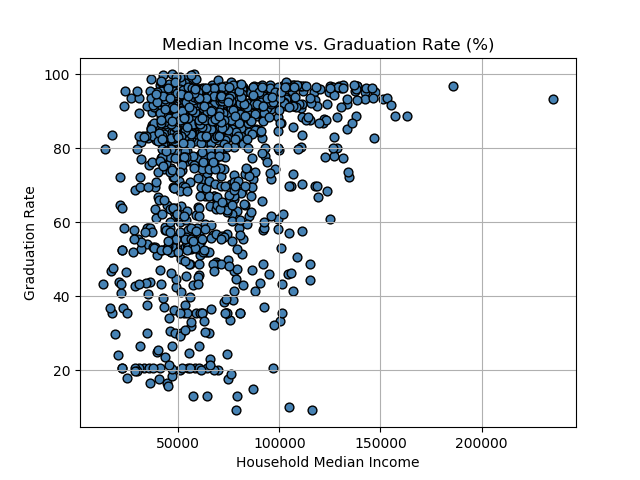

In [74]:
# Build a scatter plot 
plt.scatter(median_income_tract["Median Income"], median_income_tract["Four Year Percent"], marker="o", s=40, color="steelblue", edgecolors='black')

# Edit graph axis and titles
plt.title("Median Income vs. Graduation Rate (%)")



plt.ylabel("Graduation Rate")
plt.xlabel("Household Median Income")
plt.grid(True)

# Save the figure
#plt.savefig("Output/Max_Temp_Latitude.png")

# Show plot
plt.show()